In [2]:
import pandas as pd 
import numpy as np

In [3]:
environnement_normees = pd.read_csv('../preprocessing/donnees_environnement_capteurs.csv', sep=';')

index = environnement_normees['Capteurs']
colonnes = environnement_normees.columns
environnement_normees = environnement_normees.drop(environnement_normees.columns[0], axis=1)

In [4]:
environnement_normees.corr()

,Typologie_zone,Type_voie,Nombre_voies,Distance_capteur_voie,Position_capteurs,Presence_arbres,Feuille_arbres,Morphologie_urbaine,Hauteur_batiments,Distance_capteur_batiment,Particularite,Trafic_Routier_vehicule_leger,Trafic_Routier_poids_lourds,Trafic_Routier_2_roues,emission_moyenne_annuelle_kg_maille_an,Donnees_Cartographie
Typologie_zone,1.000000,-0.220877,0.248868,0.370505,0.052886,-0.047574,0.069767,-0.347928,0.207387,-0.201783,0.173556,-0.209963,-0.235349,-0.225360,0.053727,-0.101846
Type_voie,-0.220877,1.000000,-0.123736,-0.197064,0.231297,0.123229,0.145318,0.252474,-0.029009,0.120798,-0.027930,0.126842,0.152644,0.129805,0.071804,0.039661
Nombre_voies,0.248868,-0.123736,1.000000,0.192088,0.148088,-0.147471,-0.003752,-0.195107,0.137270,-0.118138,0.256226,-0.728442,-0.700993,-0.731524,-0.307444,-0.488624
Distance_capteur_voie,0.370505,-0.197064,0.192088,1.000000,-0.147529,-0.382069,-0.302956,-0.234479,0.101660,-0.123446,0.016604,-0.293408,-0.227236,-0.297856,0.137896,-0.048350
Position_capteurs,0.052886,0.231297,0.148088,-0.147529,1.000000,0.308228,0.280040,-0.073903,0.172549,-0.034501,0.166979,-0.243835,-0.155039,-0.238002,-0.178201,-0.227337
Presence_arbres,-0.047574,0.123229,-0.147471,-0.382069,0.308228,1.000000,0.747910,0.169085,-0.012202,0.267400,0.049689,0.075030,0.064935,0.078650,-0.312424,-0.194273
Feuille_arbres,0.069767,0.145318,-0.003752,-0.302956,0.280040,0.747910,1.000000,0.126073,0.021321,0.198364,0.024348,-0.111425,-0.135904,-0.112689,-0.371634,-0.336961
Morphologie_urbaine,-0.347928,0.252474,-0.195107,-0.234479,-0.073903,0.169085,0.126073,1.000000,-0.556931,0.557476,-0.276683,-0.016390,0.010322,-0.010161,-0.307084,-0.216647
Hauteur_batiments,0.207387,-0.029009,0.137270,0.101660,0.172549,-0.012202,0.021321,-0.556931,1.000000,-0.194532,0.134608,-0.116751,-0.115277,-0.123036,0.270166,0.032952
Distance_capteur_batiment,-0.201783,0.120798,-0.118138,-0.123446,-0.034501,0.267400,0.198364,0.557476,-0.194532,1.000000,-0.239988,-0.091284,0.036386,-0.081452,-0.293546,-0.191614


In [5]:
Y_tsne = environnement_normees.to_numpy()
Y_acp = environnement_normees.to_numpy()

## Début ACP

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
pca = PCA(n_components=16)
pca.fit(Y_acp)

print(pca.explained_variance_ratio_)
print(pca.get_covariance())

[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]
[[ 1.01041667 -0.22317808  0.25146054  0.37436407  0.05343735 -0.04806906
   0.07049364 -0.35155207  0.20954739 -0.20388511  0.17536383 -0.21215008
  -0.23780072 -0.22770753  0.05428619 -0.10290664]
 [-0.22317808  1.01041667 -0.12502507 -0.19911656  0.2337066   0.12451252
   0.14683194  0.25510389 -0.02931113  0.12205639 -0.02822133  0.12816277
   0.15423437  0.13115706  0.07255147  0.04007379]
 [ 0.25146054 -0.12502507  1.01041667  0.19408912  0.14963033 -0.14900757
  -0.0037911  -0.19713934  0.13869946 -0.11936857  0.25889511 -0.73602965
  -0.70829469 -0.73914418 -0.31064651 -0.49371333]
 [ 0.37436407 -0.19911656  0.19408912  1.01041667 -0.14906576 -0.38604848
  -0.30611167 -0.23692142  0.10271917 -0.12473214  0.01677707 -0.296464
  -0.2296035

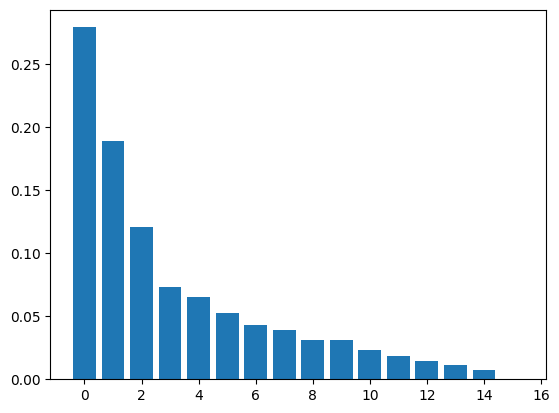

In [8]:
x = np.arange(0, 16, 1)
y = pca.explained_variance_ratio_
plt.bar(x, y)
plt.show()

In [9]:
print(np.cumsum(pca.explained_variance_ratio_))
print("====")
print(pca.explained_variance_ratio_)

[0.27920685 0.46859632 0.58975437 0.66286967 0.72819046 0.7805915
 0.8235922  0.86289779 0.89423892 0.92516435 0.94855432 0.96667885
 0.98104082 0.99245761 0.99996384 1.        ]
====
[2.79206849e-01 1.89389469e-01 1.21158054e-01 7.31152966e-02
 6.53207906e-02 5.24010400e-02 4.30007014e-02 3.93055934e-02
 3.13411286e-02 3.09254262e-02 2.33899708e-02 1.81245351e-02
 1.43619639e-02 1.14167913e-02 7.50622980e-03 3.61605720e-05]


**Part d'inertie** : choisit le nombre d'axe de façon à conserver une certaine part de l'inertie total, cela revient à fixer un seuil de qualité global

**Regle de Kaiser** : On retient que les axes associés aux valeurs propres considérées comme les plus "informatives", donc supérieures à leurs mopyennes I/p

**Eboulis des valeurs propres** : On trace un graphe représentant la décroissance des valeurs propres et on cherche un coude dans le graphe. On retient les axes associées aux valeurs propres situées avant le coude. 

5, 4, 3, 

## ACP sur uniquement 4 composant 

In [50]:
pca = PCA(n_components=4)
Z_acp = pca.fit_transform(Y_acp)



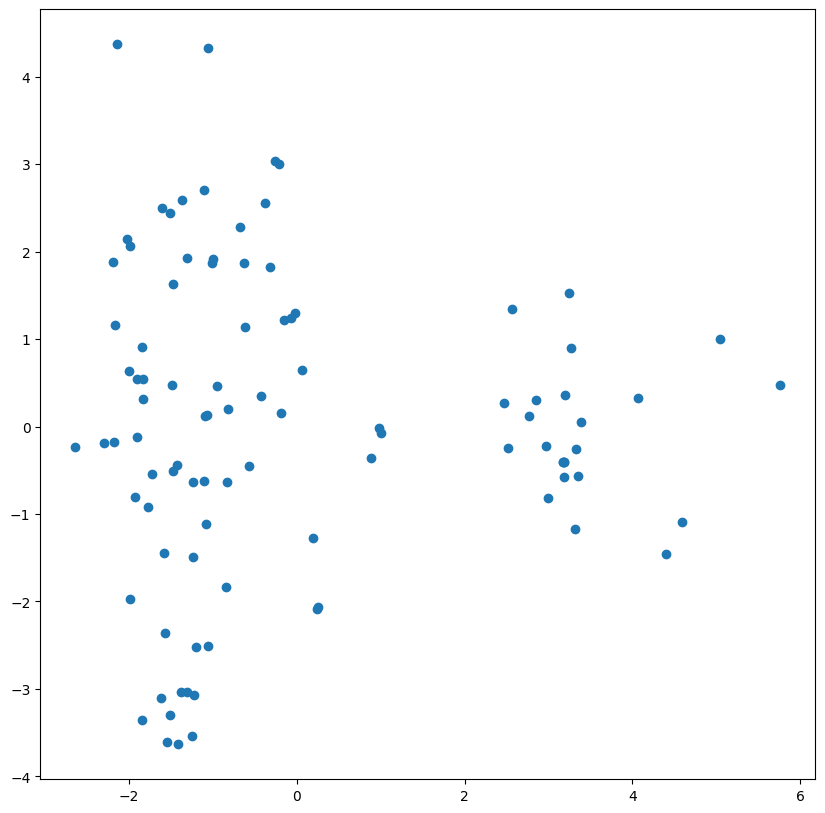

In [51]:
x = Z_acp[:,0]
y = Z_acp[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [52]:
tsne = TSNE(n_components=2, random_state=42)
Z_tsne = tsne.fit_transform(Z_acp)


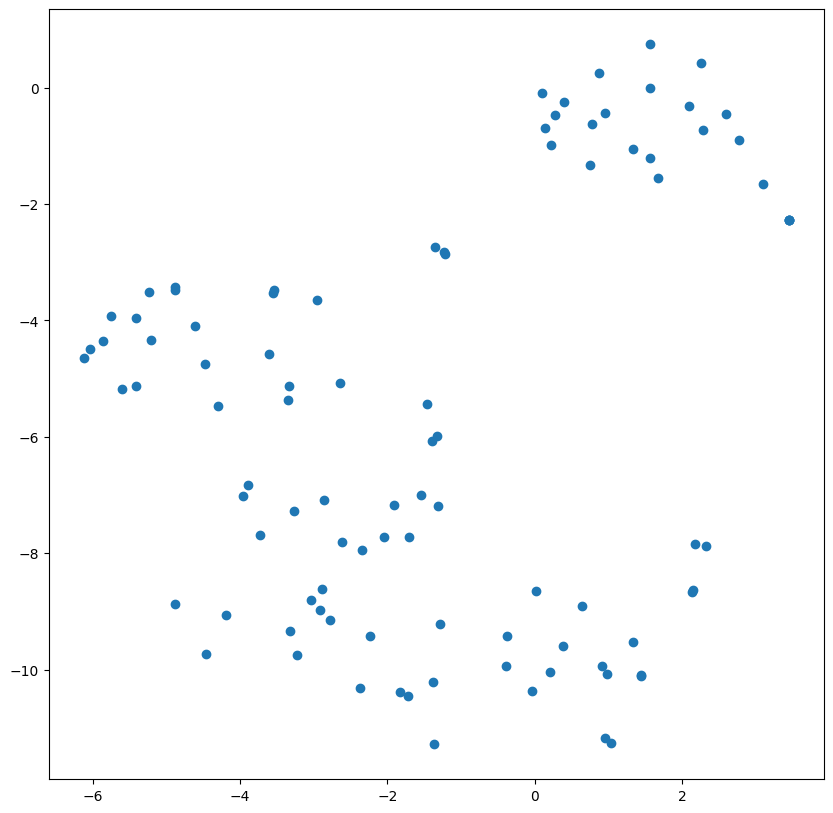

In [53]:
x = Z_tsne[:,0]
y = Z_tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

In [54]:
matrice = np.triu(environnement_normees.corr(), k=1)

In [55]:


# Récupérer les indices des valeurs les plus corrélées positivement
indices_corr_positives = np.where((matrice > 0.8) & (matrice < 1))

# Récupérer les indices des valeurs les plus corrélées négativement
indices_corr_negatives = np.where((matrice < -0.73) & (matrice > -1))


In [ ]:
indices_corr_positives

In [ ]:
c

In [ ]:

indices_moins_corr = np.where((np.abs(matrice) > 0) & (np.abs(matrice) < 0.01))


In [ ]:
indices_moins_corr

In [ ]:
colonnes[indices_moins_corr]

## Correlation 

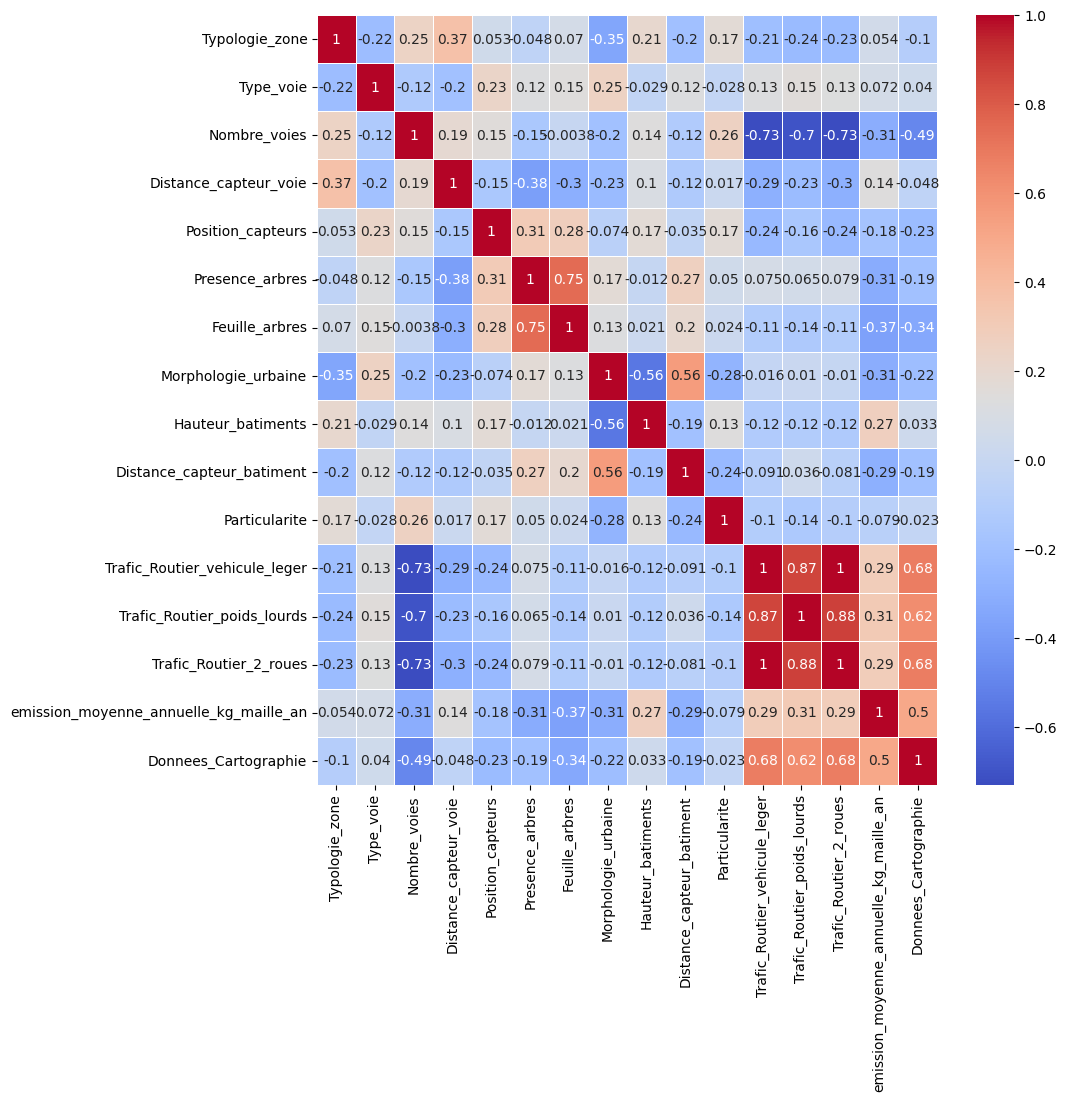

In [56]:
import seaborn as sns 

sns.heatmap(environnement_normees.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [64]:
valeurs_propres = pca.explained_variance_ #valeurs propres                                       
vecteurs_propres = pca.components_ #vecteurs propres 

correlations = np.zeros((pca.n_components_, len(colonnes)-1))
for i in range(pca.n_components_):
    for y in range(len(colonnes)-1): # car on a garder index
        correlations[i,y] = np.sqrt(valeurs_propres[i]) * vecteurs_propres[i, y]

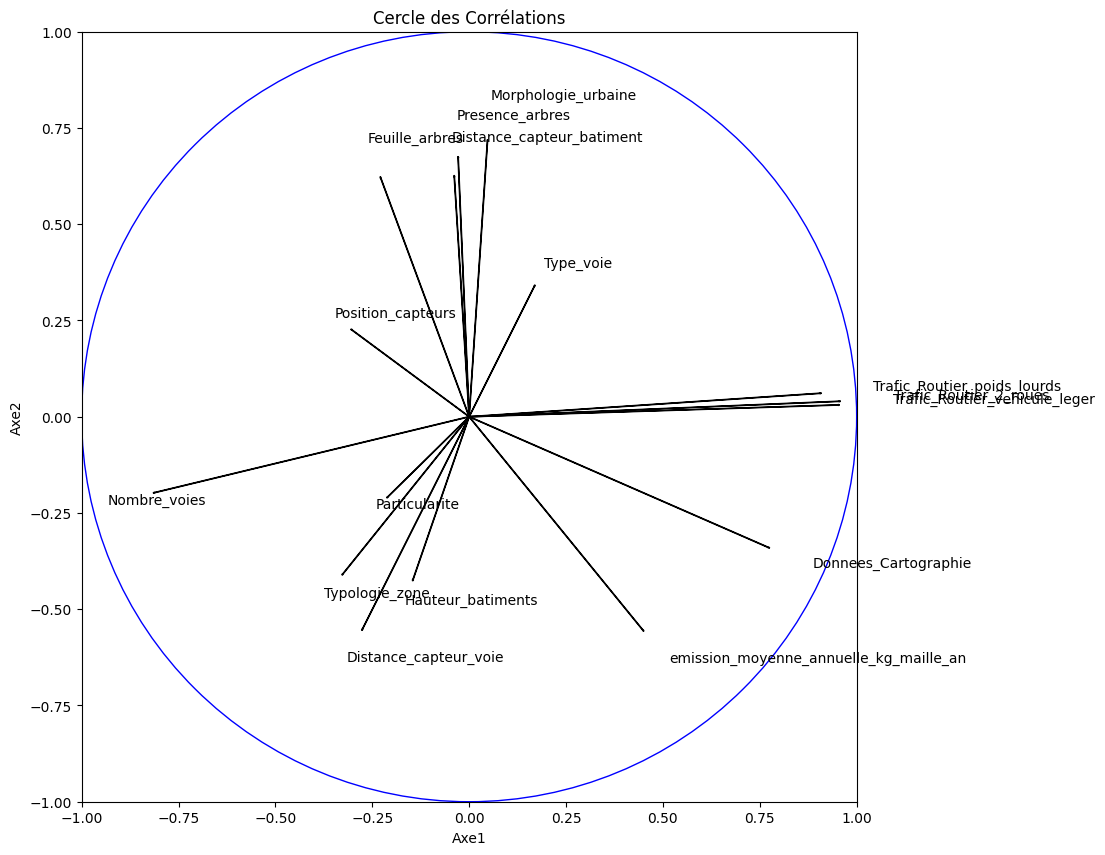

In [79]:
# Créez une figure 
plt.figure(figsize=(10, 10))

# Tracez le cercle des corrélations 
circle = plt.Circle((0, 0), 1, fill=False, color='b') 
plt.gca().add_artist(circle) 

# Tracez les variables projetées sur le plan factoriel 
for i in range(len(correlations[0])): 
    plt.arrow(0, 0, correlations[0, i], correlations[1, i]) 
    plt.text(correlations[0, i] * 1.15, correlations[1, i] * 1.15, f"{colonnes[i+1]}")

# Ajout des labels des axes x et y
plt.xlabel('Axe1')
plt.ylabel('Axe2')
plt.title('Cercle des Corrélations')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()
plt.show()

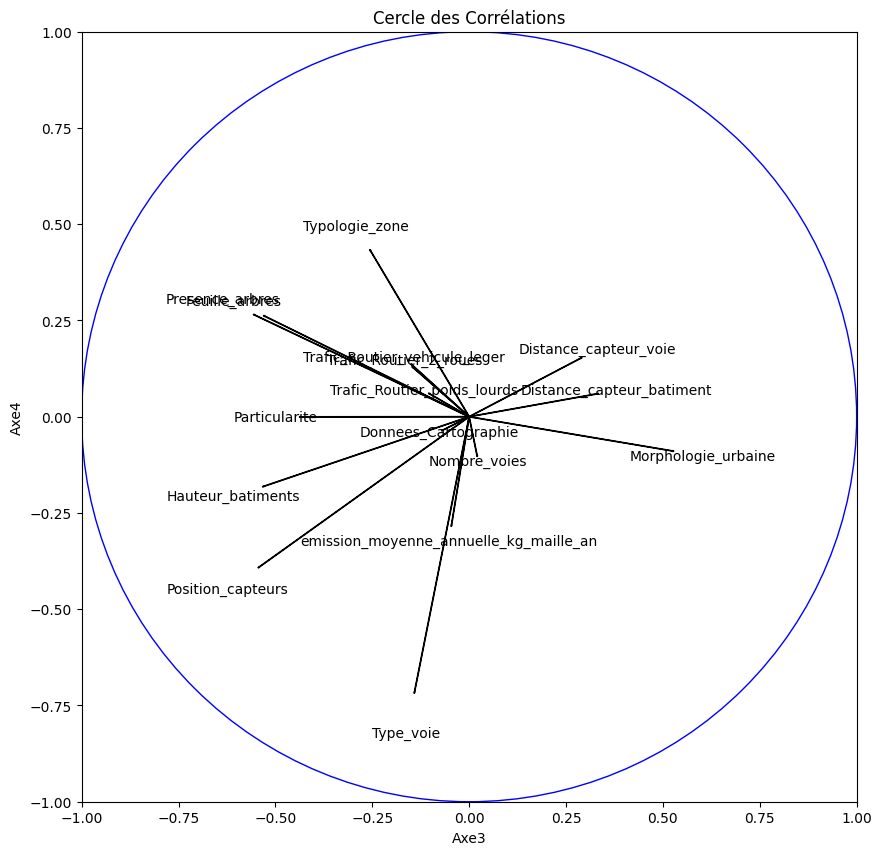

In [80]:
# Créez une figure 
plt.figure(figsize=(10, 10))

# Tracez le cercle des corrélations 
circle = plt.Circle((0, 0), 1, fill=False, color='b') 
plt.gca().add_artist(circle) 

# Tracez les variables projetées sur le plan factoriel 
for i in range(len(correlations[0])): 
    plt.arrow(0, 0, correlations[2, i], correlations[3, i]) 
    plt.text(correlations[2, i] * 1.15, correlations[3, i] * 1.15, f"{colonnes[i+1]}", ha='center', va='center')

# Ajout des labels des axes x et y
plt.xlabel('Axe3')
plt.ylabel('Axe4')
plt.title('Cercle des Corrélations')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [61]:
correlations

array([[-3.25681448e-01,  1.68144172e-01, -8.11470527e-01,
        -2.75271472e-01, -3.02121732e-01, -2.83388344e-02,
        -2.28050561e-01,  4.72848533e-02, -1.44760981e-01,
        -3.82930182e-02, -2.09833099e-01,  9.51608985e-01,
         9.05129828e-01,  9.54494119e-01,  4.48193854e-01,
         7.71824072e-01,  0.00000000e+00],
       [-4.08094638e-01,  3.38567332e-01, -1.97062549e-01,
        -5.51398370e-01,  2.25108924e-01,  6.72160268e-01,
         6.19704248e-01,  7.16158102e-01, -4.22665475e-01,
         6.22942053e-01, -2.08028570e-01,  3.05148661e-02,
         6.08134661e-02,  4.00044230e-02, -5.54060319e-01,
        -3.39371298e-01,  0.00000000e+00],
       [-2.54381648e-01, -1.40937353e-01,  2.02554191e-02,
         2.87858568e-01, -5.41540128e-01, -5.53428273e-01,
        -5.27452975e-01,  5.24495864e-01, -5.29754585e-01,
         3.30316700e-01, -4.34305019e-01, -1.47462900e-01,
        -1.01567936e-01, -1.44701372e-01, -4.55430498e-02,
        -6.76805753e-02,  0.0

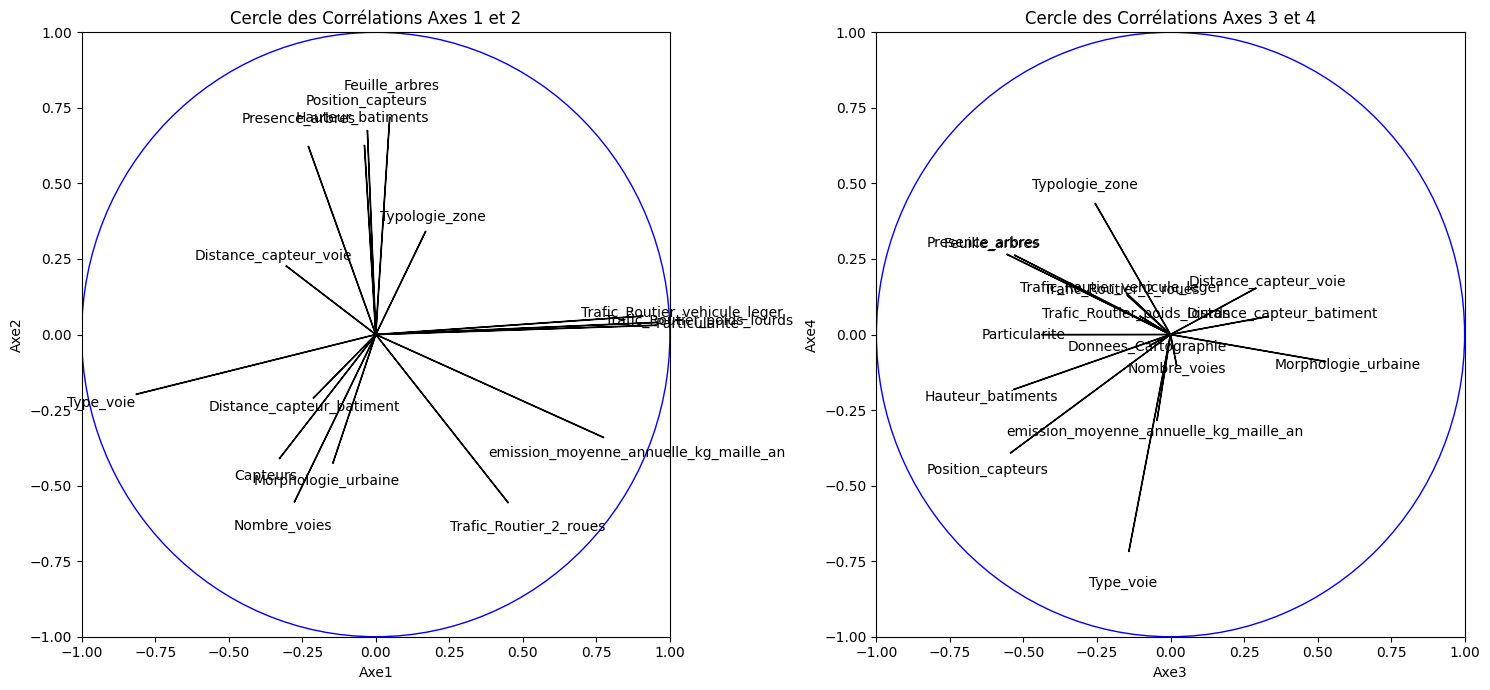

In [82]:
# Créer une figure avec une grille de sous-graphiques (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Tracer le cercle de corrélation pour les composantes 1 et 2
axs[0].add_artist(plt.Circle((0, 0), 1, fill=False, color='b'))
for i in range(len(correlations[0])):
    axs[0].arrow(0, 0, correlations[0, i], correlations[1, i], label=colonnes[i])
    axs[0].text(correlations[0, i] * 1.15, correlations[1, i] * 1.15, f"{colonnes[i]}", ha='center', va='center')
axs[0].set_xlabel('Axe1')
axs[0].set_ylabel('Axe2')
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(-1, 1)
axs[0].set_title('Cercle des Corrélations Axes 1 et 2')

# Tracer le cercle de corrélation pour les composantes 3 et 4
axs[1].add_artist(plt.Circle((0, 0), 1, fill=False, color='b'))
for i in range(len(correlations[2])):
    axs[1].arrow(0, 0, correlations[2, i], correlations[3, i], label=colonnes[i+1])
    axs[1].text(correlations[2, i] * 1.15, correlations[3, i] * 1.15, f"{colonnes[i+1]}", ha='center', va='center')
axs[1].set_xlabel('Axe3')
axs[1].set_ylabel('Axe4')
axs[1].set_xlim(-1, 1)
axs[1].set_ylim(-1, 1)
axs[1].set_title('Cercle des Corrélations Axes 3 et 4')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


### Clustering Hierarchique

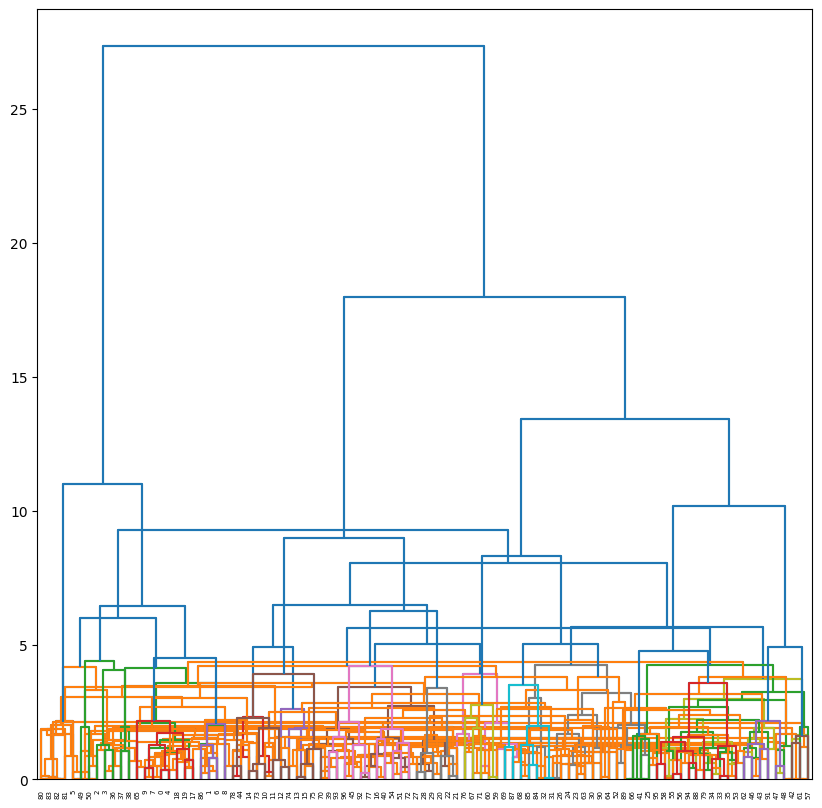

In [87]:
import scipy.cluster.hierarchy as SCH

algorithms = ["single","complete","average","centroid","ward"]


#linkage permet de faire la classification ascendante hierarchique et retourne une matrice de liaision
for algo in algorithms:
    matrice_liaisons = SCH.linkage(Z_acp, method=algo, optimal_ordering=True) 

    dendrogram = SCH.dendrogram(matrice_liaisons, color_threshold=0)
    dendrogram_cut = SCH.dendrogram(matrice_liaisons, color_threshold=4.5)
# le dendrogram représente le lien entre les classes mais aussi la distance entre les classes fusionnbées via la hauteur des branches 
# pour prendre la meilleur distance on regarde la distance entre les liaisons, si elle est trop élévé c'est pas trop utilisable il faut : clusters homogènes et bien sépares

#etant donné que nous avons 6 note possible nous aimerions un nombre de K = 6 clusters mais plutot environ 4-5
#pour avoir 6 cluster il nous couper le dendrogram à t=4.5
# tout est visuel pour le moment 




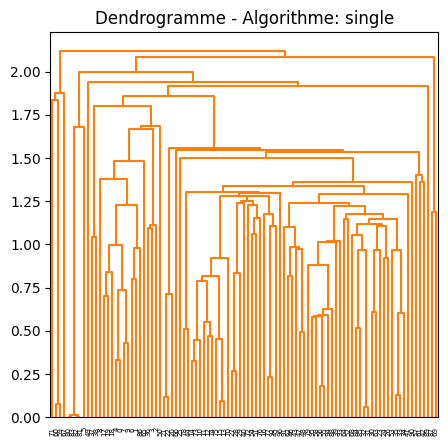

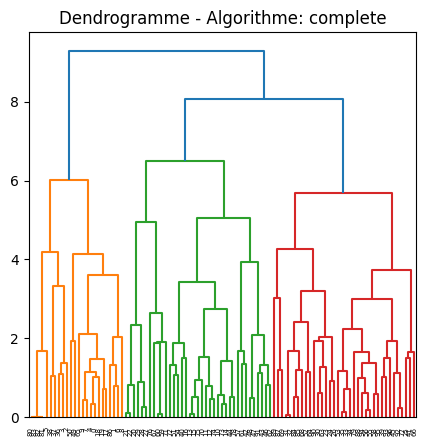

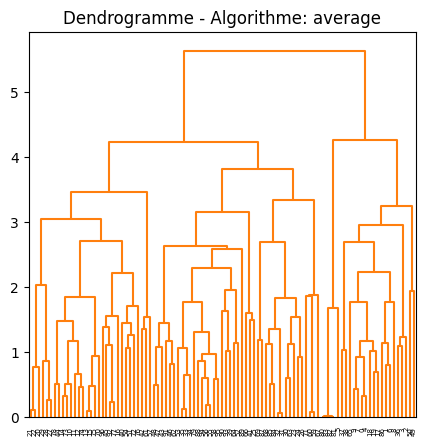

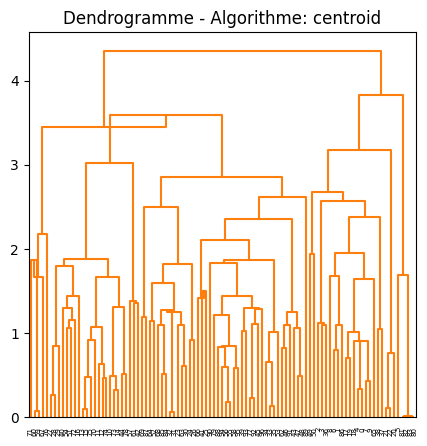

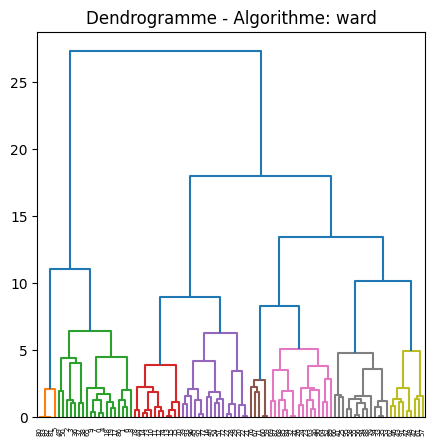

In [111]:
import scipy.cluster.hierarchy as SCH
import matplotlib.pyplot as plt

# Supposons que Z_acp est ta matrice de données pour la CAH

algorithms = ["single", "complete", "average", "centroid", "ward"]
threshold = 8  # Le seuil que tu veux utiliser pour couper le dendrogramme

# Boucle sur les méthodes d'agglomération
for algo in algorithms:
    # Créer une nouvelle figure pour chaque algorithme
    plt.figure(figsize=(5, 5))


    # Effectuer la CAH
    matrice_liaisons = SCH.linkage(Z_acp, method=algo, optimal_ordering=True)

    # Tracer le dendrogramme
    SCH.dendrogram(matrice_liaisons, color_threshold=threshold)

    # Ajouter un titre au dendrogramme
    plt.title(f"Dendrogramme - Algorithme: {algo}")

    # Afficher la figure
    plt.show()


In [112]:
from sklearn.metrics import silhouette_score

matrice_liaisons = SCH.linkage(Z_acp, method="ward", optimal_ordering=True)

tab = np.arange(5, 15, 0.5)

for t in tab:
    print(t)
    cluster = SCH.fcluster(matrice_liaisons, t, criterion='distance')
    print(silhouette_score(Z_acp, cluster))

5.0
0.32534351236160386
5.5
0.3384749344370593
6.0
0.3384749344370593
6.5
0.342125396086231
7.0
0.342125396086231
7.5
0.342125396086231
8.0
0.342125396086231
8.5
0.32234274693160586
9.0
0.32234274693160586
9.5
0.31935686334193464
10.0
0.31935686334193464
10.5
0.314157115105851
11.0
0.314157115105851
11.5
0.30438127543421134
12.0
0.30438127543421134
12.5
0.30438127543421134
13.0
0.30438127543421134
13.5
0.3037678997361413
14.0
0.3037678997361413
14.5
0.3037678997361413


In [130]:
#  choix de t = 8 
t=8

cluster = SCH.fcluster(matrice_liaisons, t, criterion='distance')

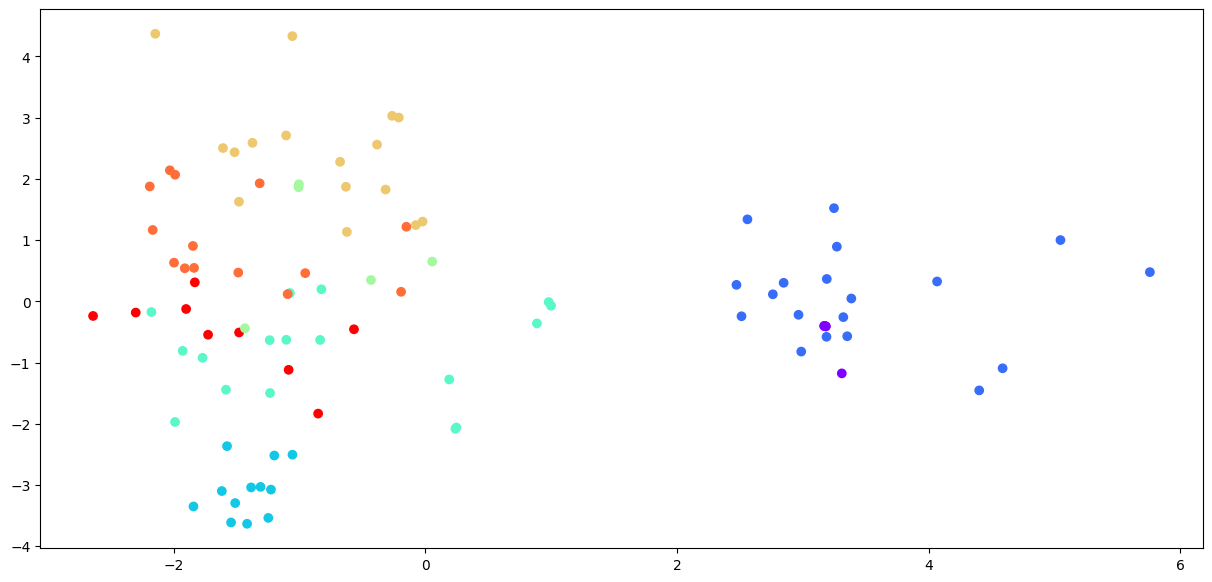

In [135]:
plt.figure(figsize=(15, 7)) 
plt.scatter(Z_acp[:,0], Z_acp[:,1], c=cluster, cmap='rainbow')
plt.show()